In [ ]:
import sys, os
from cProfile import label
import numpy as np
import matplotlib.pyplot as plt
import warnings
from scipy.constants import c
import importlib
import tools

In [2]:
sys.path.append('C:\\Program Files\\Lumerical\\v221\\api\\python')
sys.path.append('C:\\Program Files\\Lumerical\\v221\\api\\python\\lumapi.py')

In [3]:
warnings.filterwarnings("ignore", category=SyntaxWarning)
import lumapi

In [4]:
icApi = lumapi.INTERCONNECT()

In [250]:
icApi.switchtolayout()
icApi.deleteall()

In [251]:
nm = 1e-9
um = 1e-6

In [1]:
importlib.reload(tools)
FSR = 1.6*nm
ng = 4.355
neff = 2.355
wavelength_start = 1530*nm
wavelength_stop = 1565*nm
##
L = 1000*um
deltaL = tools.getDeltaL(FSR, (wavelength_start+wavelength_stop)/2, ng)
Lpi = tools.getLpi((wavelength_start+wavelength_stop)/2, neff)

deltaL_values = L + np.array([deltaL,2*deltaL,-(2*deltaL + Lpi),-2*deltaL,deltaL, 2*deltaL,-(2*deltaL + Lpi),-2*deltaL])
k = [0.5, 0.13, 0.12, 0.5,0.25]
deltaL_values

NameError: name 'importlib' is not defined

In [324]:
importlib.reload(tools)
tools.placeOna(icApi,'ona1',1000,-200,8,1000,c/(1530*nm), c/(1565*nm))

LumApiError: "failed to create element 'Optical Network Analyzer' in Analysis Mode. You need to switch to design Mode."

In [321]:
importlib.reload(tools)
tools.MZILatticefilter(icApi,0, neff, ng, L, deltaL_values, k)

0

In [254]:
neff = 2.355
ng = 4.355
#first order filter
icApi.addelement('Waveguide Coupler')
icApi.set('name', 'dc1')
icApi.addelement('Straight Waveguide')
icApi.set('name', 'wg1')
icApi.set('length', 50*um)
icApi.set('effective index 1', neff)
icApi.set('group index 1', ng)
icApi.addelement('Straight Waveguide')
icApi.set('name', 'wg2')
icApi.set('length', 50*um+deltaL)
icApi.set('effective index 1', neff)
icApi.set('group index 1', ng)
icApi.addelement('Waveguide Coupler')
icApi.set('name', 'dc2')


In [255]:
icApi.connect('dc1','port 3', 'wg1', 'port 1')
icApi.connect('dc1','port 4', 'wg2', 'port 1')
icApi.connect('wg1', 'port 2', 'dc2', 'port 1')
icApi.connect('wg2', 'port 2', 'dc2', 'port 2')
icApi.connect('ona1', 'output', 'dc1', 'port 2')
icApi.connect('dc2', 'port 3', 'ona1', 'input 1')
icApi.connect('dc2', 'port 4', 'ona1', 'input 2')

1.0

In [256]:
icApi.run()

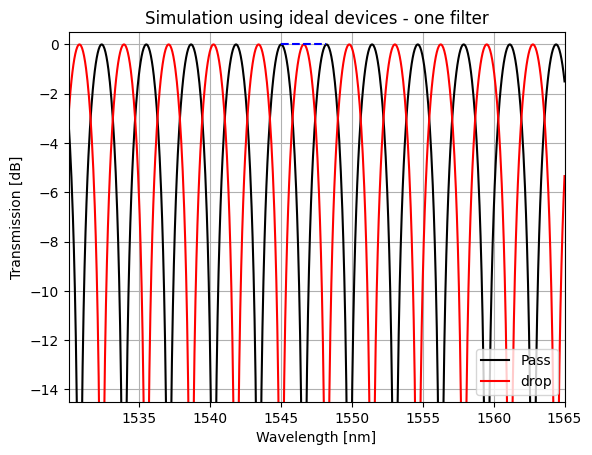

In [257]:
data = icApi.getresult('ona1', 'input 1/mode 1/gain')
data2 = icApi.getresult('ona1', 'input 2/mode 1/gain')
plt.plot(data['wavelength']/nm, data['TE gain (dB)'],color='black',label='Pass')
plt.plot(data2['wavelength']/nm, data2['TE gain (dB)'],color='red', label='drop')
plt.legend()
fsrh=1545
plt.hlines(0,xmin=fsrh,xmax=fsrh+3.2, color='blue',linestyles='dashed')
plt.xlim(min(data['wavelength']/nm), max(data['wavelength']/nm))
plt.ylim(-14.5, 0.5)
plt.xlabel('Wavelength [nm]')
plt.ylabel('Transmission [dB]')
plt.grid()
plt.title('Simulation using ideal devices - one filter')
plt.savefig('Simulation using ideal devices - one filter.png')

In [258]:
icApi.switchtolayout()
#second sector upper arm
icApi.addelement('Waveguide Coupler')
icApi.set('name', 'dc3')
icApi.addelement('Straight Waveguide')
icApi.set('name', 'wg3')
icApi.set('length', 50*um/2)
icApi.set('effective index 1', neff)
icApi.set('group index 1', ng)
icApi.addelement('Straight Waveguide')
icApi.set('name', 'wg4')
icApi.set('length', (50*um+deltaL)/2)
icApi.set('effective index 1', neff)
icApi.set('group index 1', ng)
icApi.addelement('Waveguide Coupler')
icApi.set('name', 'dc4')

In [259]:
icApi.disconnect('dc2', 'port 3', 'ona1', 'input 1')
icApi.disconnect('dc2', 'port 4', 'ona1', 'input 2')

icApi.connect('dc3','port 3', 'wg3', 'port 1')
icApi.connect('dc3','port 4', 'wg4', 'port 1')
icApi.connect('wg3', 'port 2', 'dc4', 'port 1')
icApi.connect('wg4', 'port 2', 'dc4', 'port 2')
icApi.connect('dc4', 'port 3', 'ona1', 'input 1')
icApi.connect('dc4', 'port 4', 'ona1', 'input 2')
icApi.connect('dc2', 'port 4', 'dc3', 'port 2')

1.0

In [260]:
icApi.run()

C:\Users\luciv\AppData\Local\Temp\ipykernel_25104\1384419160.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


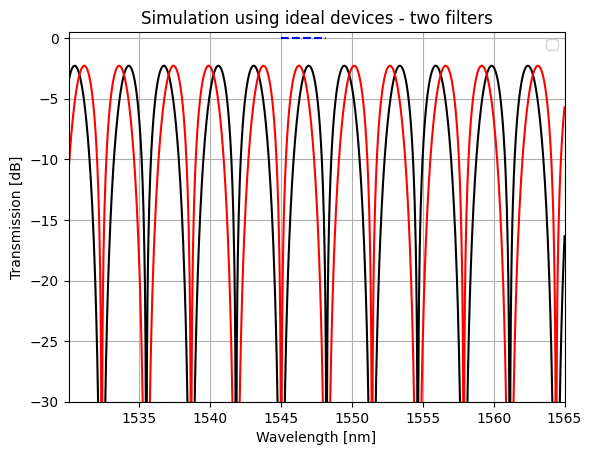

In [263]:
data = icApi.getresult('ona1', 'input 1/mode 1/gain')
data2 = icApi.getresult('ona1', 'input 2/mode 1/gain')
plt.plot(data['wavelength']/nm, data['TE gain (dB)'],color='black',label='')
plt.plot(data2['wavelength']/nm, data2['TE gain (dB)'],color='red', label='')
plt.legend()
fsrh=1545
plt.hlines(0,xmin=fsrh,xmax=fsrh+3.2, color='blue',linestyles='dashed')
plt.xlim(min(data['wavelength']/nm), max(data['wavelength']/nm))
plt.ylim(-30, 0.5)
plt.xlabel('Wavelength [nm]')
plt.ylabel('Transmission [dB]')
plt.grid()
plt.title('Simulation using ideal devices - two filters')
plt.savefig('Simulation using ideal devices - two filters.png')

In [173]:
#add directional couplers
for i in range(0,7,1):
    icApi.addelement('Waveguide Coupler')
    icApi.set('name', f'dc{i+1}')

In [174]:
#position directional couplers
icApi.setposition('dc1', 0, 200)

for i in range(2,8,1):
    if i<4:
        if i%2 != 0:
            icApi.setposition(f'dc{i}', 300, 300 )
        else:
            icApi.setposition(f'dc{i}', 300, 100)
    else:
        icApi.setposition(f'dc{i}', 650, 50 + (i-4)*120)

In [175]:
#add waveguides
for i in range(0,6,1):
    icApi.addelement('Straight Waveguide')
    icApi.set('name', f'wg{i+1}')

In [176]:
#position waveguides
#1st stage
icApi.setposition('wg1', 150, 120)
icApi.setposition('wg2', 150, 280)
#2nd stage upper part
icApi.setposition('wg3', 475, 70)
icApi.setposition('wg4', 475, 150)
#2nd stage lower part
icApi.setposition('wg5', 475, 270)
icApi.setposition('wg6', 475, 390)

In [179]:
#connecting directional couplers to waveguides
icApi.connect('dc1','port 3', 'wg1', 'port 1')
icApi.connect('dc1','port 4', 'wg2', 'port 1')

icApi.connect('wg1', 'port 2', 'dc2', 'port 2')
icApi.connect('wg2', 'port 2', 'dc3', 'port 1')

icApi.connect('dc2', 'port 3', 'wg3', 'port 1')
icApi.connect('dc2', 'port 4', 'wg4', 'port 1')

icApi.connect('dc3', 'port 3', 'wg5', 'port 1')
icApi.connect('dc3', 'port 4', 'wg6', 'port 1')

for i in range(2,6,1):
    if i%2!=0:
        icApi.connect(f'wg{i+1}', 'port 2', f'dc{i+2}', 'port 1')
    else:
        icApi.connect(f'wg{i+1}', 'port 2', f'dc{i+2}', 'port 2')

In [180]:
#ona connections
icApi.connect('ona1', 'output', 'dc1', 'port 2')
a = 1
for i in range(4,8,1):
    icApi.connect(f'dc{i}', 'port 3', 'ona1', f'input {a}')
    icApi.connect(f'dc{i}', 'port 4', 'ona1', f'input {a+1}')
    a+=2

## FSR @ 200GHz = 1.6nm

\begin{equation}
\Delta_L = \frac{\lambda^2}{n_g\cdot FSR}
\end{equation}

1547.5

In [200]:
for i in range(0,6,2):
    icApi.select(f'wg{i+1}')
    icApi.set('length', 50*um)
    icApi.select(f'wg{i+2}')
    icApi.set('length', 50*um + deltaL)

In [197]:
for i in range(0,6,2):
    print(i+1, i+2)
    

1 2
3 4
5 6
